# Case Study 5 - SGD & SVM

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
    - [Scope](#scope)
    - [Introduction](#introduction)
    - [Methods](#methods)
    - [Results](#results)
* [Data Evaluation](#data-evaluation)
    - [Loading Data](#loading-data) 
    - [Data Summary](#data-summary)
    - [Missing Values](#missing-values)
    - [Feature Removal](#feature-removal)
    - [Exploratory Data Analysis (EDA)](#eda)
    - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
    - [Sampling & Scaling Data](#sampling-scaling-data)
    - [Proposed Method](#proposed-metrics)
    - [Evaluation Metrics](#evaluation-metrics)
    - [Feature Selection](#feature-selection)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [Model](#model)
    - [Performance Analysis](#performance-analysis)
* [Model Interpretability & Explainability](#model-explanation)
    - [Examining Feature Importance](#examining-feature-importance)
* [Conclusion](#conclusion)
    - [Final Model Proposal](#final-model-proposal)
    - [Future Considerations and Model Enhancements](#model-enhancements)
    - [Alternative Modeling Approaches](#alternative-modeling-approaches)

# Business Understanding & Executive Summary <a id='business-understanding'/>

## Objective:
The goal of this case study is to build a Firewall classification model to automatically allow or deny access requests in real time with a high level of accuracy. 

## Introduction:
This case study is about the management of firewall traffic. Cyber security consists of all the technologies and practices that keep computer systems and electronic data safe. A firewall is one of the most critical components in supporting big corporations to protect their data. The challenge offered to the team was to build a classification model that can automatically allow or deny the access request based on the features of the incoming request. A firewall is a hardware or software filter that authorizes access based on a certain set of pre-established rules. These rules are based on multiple aspects of packet data like their source, destination, content, protocol, and other data characteristics. When the network is significantly large, and policies are complicated, manual cross-check may be insufficient, inefficient, and ineffective in detecting anomalies. An automated model based on machine learning and high-performance computing methods is leveraged to detect anomalies to strengthen the firewall. To achieve this, firewall logs are analyzed, and the extracted features are fed to a set of machine learning classification algorithms.

Cybercrimes are increasing every day, which makes it critical that organizations build a robust system to ensure CPI (Customer Personal Information) and other confidential information is kept secure. Firewalls are one of the most critical tools to safeguard the network. Firewalls are like fencing to keep trespassers away and not allow unauthorized access to the system.


<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_5/Firewall.png" width=500 height=500 />   

The efficiency and effectiveness of the firewall are judged by its accuracy and speed to identify malware and other suspicious activities. The firewall implementation can be done by hardware, software, and cloud. It carries out its function by filtering information at the application layer (proxy server) or permitting (or blocking) based on state, port, or protocol. Next-Generation Firewalls conduct deep packet inspection (beyond port/ protocol inspection). The most advanced firewalls are Unified Threat Management (UTM), which integrate multiple methodologies like stateful inspection, deep packet inspection, and Antivirus. The firewalls can provide advanced threat detection and mitigation by correlating ports, protocols, and/or suspicious behaviors. [1]



## Model:
The team used SVM (Support Vector Machine) and SGD (Stochastic Gradient Descent) classification algorithms to categorize the requests into Allowed or Denied.

<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_5/final_model_coef.png" />

# Data Evaluation <a id='data-evaluation'>
    

Summarize data being used?

Are there missing values?

Which variables are needed and which are not?

What assumptions or conclusions are you drawing about your data?

## Dataset:
The provided dataset contains 65,532 rows and 12 columns. It includes the ports, bytes, and packet information along with elapsed time. The dataset will need no imputation as there are no missing values. The ‘Action’ response column identifies the requests that were Allowed or Denied. ‘Action’ with a designation, "deny", "drop", or "reset-both" was categorized as Denied and assigned a value of "0" (27,892 requests) and Allowed requests were assigned as "1" (37,640 requests). The Dataset is relatively balanced per the barchart below. However, the team decided to use stratified splitting for training and test in an abundance of caution. Also, the dataset will be scaled to bring the values into acceptable ranges for faster, more efficient modeling.

<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_5/Action Count.png" width=250 height=250 />

All of the data (other than the target) are numeric, but not necessarily treated as continuous variables. As discussed in the introduction, ports represent a sort of address and are technically categorical features. However, many models can handle these port variables as continuous features which is discussed further below.

The Port features were explored for any relationships to the response variable.  Both NAT Source and Destination Ports had clear separation of the class variable at Ports = 0 vs. Ports  > 0. 

<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_5/EDA_All_Ports.png" width=600 height=600 />

<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_5/EDA_Ports_0.png" width=600 height=600 />

The other numeric features were also examined with histograms.  This was done to explore the scale and distribution of the features, as well as any relationships to the response variable.  Note: features are plotted on a log scale to better visualize the highly skewed data.  Elapsed Time (sec) showed the biggest separation of the target variable with Elapsed Time (sec) = 0 vs. Elapsed Time (sec) > 0.

<img src="https://raw.githubusercontent.com/olmosjorge28/QTW-SPRING-2022/main/ds7333_case_study_5/EDA_Num_Vars.png" width=600 height=600 />

In [1]:
# standard libraries
import pandas as pd
import numpy as np
#import re
import os
from IPython.display import Image
from abc import ABC, abstractmethod
import time
#import sklearn
#import time

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate
from IPython.display import clear_output
import xgboost

# data pre-processing
from scipy.io import arff
#from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.impute._base import _BaseImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection._split import BaseShuffleSplit
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# prediction models
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm._base import BaseSVC 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# import warnings filter
import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

## Loading Data <a id='loading-data'>

In [2]:
from os import listdir
from os.path import isfile, join

class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir

In [3]:
class Loader:
    df = pd.DataFrame()
    
    @abstractmethod
    def load_data(self, file_name):
        pass
    
    @abstractmethod
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)
        

In [4]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path())
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [5]:
def clean_data(df):
    data = df.copy()
    data.loc[ df['Action']!='allow', 'Action']='not allow'
    depandent = data['Action']
    depandent = (depandent=='allow').astype(int)
    data['Action']= depandent
    return data

In [6]:
loader = CSVLoader(FilePathManager('log2.csv'))
loader.load_data(clean_data)

## Data Summary <a id='data-summary'>

## Missing Values <a id='missing-values'>



## Feature Removal <a id='feature-removal'>

## Exploratory Data Analysis (EDA) <a id='eda'>

## Assumptions <a id='assumptions'>

# Model Preparations <a id='model-preparations'/>

What methods did you use (or not) to solve the problem?

Why are the methods you chose appropriate given the business objective?

How did you decide your approach was useful?  If more than one method, which one was better or why are each better or not?

What evaluation smetrics are most useful given the problem is a binary classification (ex. accuracy, f1-score, precision, recall AUC, etc)?



SVM creates decision boundaries with a margin of separation for classification.  Points on one side of the boundary are classified as Allowed, and points on the other side of the boundary are classified as Denied.  Only the points near the decision boundaries and misclassifications are used to determine where the boundaries are ultimately placed.  In this way, SVM is well suited to handle this “gray area” of classification where the two classes are more similar.  These boundaries can be linear or nonlinear (i.e. linear, poly, rbf, sigmoid).  Also, SVM is resistant to the effect of outliers as long as the outliers are on the correct side of the boundary.

The Stochastic Gradient Descent (SGD) classifier is a simple and efficient approach to fitting classifiers and regressors such as (linear) Support Vector Machines and Logistic Regression. These are very efficient and easy to implement. SGD should take a much shorter time to complete by minimizing the loss “stochastically”:

Due to the large number of rows in the dataset, SGD implementation will leverage a “partial fit” training approach to loop through the dataset in smaller batches to improve the training efficiency (both time and memory). SGD is a method that can reduce memory when working with datasets of vast sizes that overwhelm available computing resources. 

SGD works similarly to linear regression and logistic regression for classification.  It requires regularization to prevent overfitting as well as hyperparameter tuning to optimize the algorithm for the best performance.

Training and test sets were created using a stratified splitting method to maintain the ratio of accepted versus denied requests. 30% of the data was withheld for the test set, and the relevant continuous features were normalized using StandardScaler.

The “port” categorical variables were considered for one hot encoding as dummy variables. The team attempted this and discovered that data would grow exponentially from 12 columns to over 27,000. The team dropped the encoded dummy variable proposal as it took a very long time to process the using SVM and SGD. The processing time is one of the critical measures along with the accuracy. Also, the team found that SVM and SGD algorithms are able to handle these categorical variables as continuous variables and still achieve consistent classification with a high accuracy. 

A range of models were explored using SVM and SGD Classifiers to tune the model hyperparameters.  Maximum accuracy and minimum compute time were the criteria used to identify the best model.

## Sampling & Scaling Data <a id='sampling-scaling-data' />

## Proposed Method <a id='proposed-metrics' />

In [7]:
class BaseImputer:
    @abstractmethod
    def fit(self, X, y=None):
        pass
    
    @abstractmethod
    def transform(self, X):
        pass

class BaseModel:
    @abstractmethod
    def fit(self, X, y, sample_weight=None):
        pass
    
    @abstractmethod
    def predict(self, X):
        pass

In [8]:
class Modeling:
    _X_train_fitted = None
    _X_test_fitted = None
    _y_train = None
    _y_test = None
    _y_preds = None
    
    def __init__(self, data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, scaler = None):
        self._data = data
        self._target_name = target_name
        self._shuffle_splitter = shuffle_splitter
        self._imputer = imputer
        self._model = model
        self._X, self._y = self._split_data()
        self._scaler = scaler
        
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y

    @property
    def model(self):
        return self._model
    
    @model.setter
    def model(self, model):
        self._model = model
     
    @property
    def X_train(self):
        return self._X_train_fitted
    
    @property
    def X_test(self):
        return self._X_test_fitted
    
    @property
    def y_train(self):
        return self._y_train
    
    @property
    def y_test(self):
        return self._y_test
    
    @property
    def y_preds(self):
        return self._y_preds
    
    def _split_data(self):
        X = self._data.copy()
        return X.drop([self._target_name], axis=1) , X[self._target_name]
    
    def _shuffle_split(self):
        X = self.X
        y = self.y
        for train_index, test_index in self._shuffle_splitter.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        return X_train, X_test, y_train, y_test
    
    def _fit_imputer(self, train):
        if self._imputer is not None:
            self._imputer.fit(train)
    
    def _fit_scaler(self, train):
        if self._scaler is not None:
            self._scaler.fit(train)
    
    def _impute_data(self, X: pd.DataFrame):
        if self._imputer is not None:
            return pd.DataFrame(self._imputer.transform(X), columns = self.X.columns, index = X.index)
        return X
    
    def _scale_data(self, X: pd.DataFrame):
        if self._scaler is not None:
            X = pd.DataFrame(self._scaler.transform(X), columns = self._X.columns)
        return X
    
    def prepare(self):
        X_train, X_test, y_train, y_test = self._shuffle_split()   
        self._fit_imputer(X_train)
        X_train = self._impute_data(X_train)
        X_test = self._impute_data(X_test)
        self._fit_scaler(X_train)
        self._X_train_fitted = self._scale_data(X_train)
        self._X_test_fitted = self._scale_data(X_test)
        self._y_train = y_train
        self._y_test = y_test
        
    def prepare_and_train(self):
        self.prepare()
        return self.train()
        
    def train(self):
        self._model.fit(self.X_train, self.y_train)
        self._y_preds = self._model.predict(self.X_train)
        
        return self.metrics(self.y_train, self.y_preds)
        
    def test(self):
        return self.metrics(self.y_test, self._model.predict(self.X_test))
       
    @abstractmethod
    def metrics(self, y_true = None, y_pred = None):
        pass

In [9]:
class ClassificationModeling(Modeling):
    def __init__(self, 
                 data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, 
                 scaler = None, 
                 beta: int = 1, 
                 classification: str = 'binary'):
        super().__init__(data, target_name, shuffle_splitter, imputer, model, scaler)
        self.beta = beta
        self.classification = classification
        
    @abstractmethod
    def metrics(self, y_true = None, y_pred = None):
        pass

In [10]:
from typing import Type, TypeVar

class SVMClassificationModeling(ClassificationModeling):
    TSVC = TypeVar("TSVC", bound=BaseSVC)
    all_models = [];
    
    def __init__(self, 
             data: pd.DataFrame, 
             target_name: str, 
             shuffle_splitter: BaseShuffleSplit, 
             imputer: BaseImputer, 
             model: BaseModel, 
             scaler = None, 
             beta: int = 1, 
             classification: str = 'binary'):
         super().__init__(data, target_name, shuffle_splitter, imputer, model, scaler, beta, classification)
        
            
    def parameter_tuning(self, params, class_to_instantiate: Type[TSVC]):
        list_of_models = []
        combination = []
        params_base = {}
        output = []
        for key, value in params.items():
            if isinstance(value, list):
                combination.append((key,value))
            else:
                params_base[key]=value
              
        result = SVMClassificationModeling.get_combinations(combination)

        for r in result:
            list_of_models.append(class_to_instantiate(**{**params_base, **r}))
            
        for a_model in list_of_models:
            self.model = a_model
            startTrain = time.time()
            train_metrics = self.train()
            endTrain = time.time()
            test_metrics = self.test()
            endTest = time.time()
            train_time = endTrain - startTrain
            test_time = endTest - endTrain
            output.append({'model': a_model, 'train_metrics': {**train_metrics,**{'elapsed_time':train_time}}, 'test_metrics': {**test_metrics,**{'elapsed_time':test_time}}})
        self.all_models = output
        return output
        
    def find_best_model(self):
        max_accuracy = self.all_models[0]['test_metrics']['accuracy']
        location = 0
        for indx, output_metrics in enumerate(self.all_models):
            if max_accuracy < output_metrics['test_metrics']['accuracy']:
                max_accuracy = output_metrics['test_metrics']['accuracy']
                location = indx
            elif max_accuracy == output_metrics['test_metrics']['accuracy']:
                if output_metrics['test_metrics']['elapsed_time'] < self.all_models[location]['test_metrics']['elapsed_time']:
                    location = indx
                
        return self.all_models[location]
    
    @staticmethod
    def get_combinations(tuples):
        length = len(tuples)
        if length > 1:
            total_params = []
            tuple_copy = tuples.copy()
            a_tuple = tuple_copy.pop(0)
            params_list = SVMClassificationModeling.get_combinations(tuple_copy)
            for value in a_tuple[1]:
                for a_params in params_list:
                    temp = { a_tuple[0]: value}
                    total_params.append({**temp, **a_params})
            return total_params
        else:
            params_list = []
            a_tuple =  tuples[0]
            for value in a_tuple[1]:
                temp = {}
                temp[a_tuple[0]] = value
                params_list.append(temp)
            return params_list
            
    
    def metrics(self, y_true = None, y_pred = None):
        if y_true is None and y_pred is None:
            y_true = self.y_train
            y_pred = self.y_preds       
        return {'matrix': confusion_matrix(y_true, y_pred), 
                'accuracy': round(accuracy_score(y_true, y_pred), 5), 
                'precision': precision_score(y_true, y_pred, average=self.classification), 
                'recall': recall_score(y_true, y_pred, average=self.classification),
                'f1': f1_score(y_true, y_pred)}

## Evaluation Metrics <a id='evaluation-metrics' />

### Baseline Model

If the model allowed all requests through it would be 57.4% accurate but useless for security.  

In [52]:
loader.get_df()['Action'].value_counts(normalize=True)

1    0.574376
0    0.425624
Name: Action, dtype: float64

## Feature Selection <a id='feature-selection' />
Regularization was used for feature selection wiht SGD.  For SGD, L1, L2, and Elastic Net regularization were used to find the best model.  L1 regularization was used for the best model with SGD. 

For SVM, sklearn only uses L2 regularization which prevents overfitting but does not help with feature reduction.

# Model Building & Evaluations <a id='model-building'/>

In this case, your primary task is to use SVM and SGD to build a model to determine whether or not to accept or deny access to internet requests coming across a network and will involve the following steps:

- Specify your sampling methodology
- Setup your models - highlighting any important parameters
- Analyze your model's performance - referencing your chosen evaluation metric (including supplemental visuals and analysis where appropriate)

## Sampling Methodology <a id='sampling-methodology'/>

### Split into training and test
The data were split into training and test sets using a 70/30 stratified split to ensure class balance in the training and test sets.  This was done in an abundance of caution (the classes were split 55:45 between Allow and Deny, respectively)

## Modeling

### SVM

In [11]:
svc_classifier = SVMClassificationModeling(loader.get_df(),'Action',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           None, # no imputation
                           SVC,
                           StandardScaler(), beta=2)

In [12]:
svc_classifier.prepare()

In [13]:
svc_results = svc_classifier.parameter_tuning({
'C': [0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 10, 100],
'kernel': ['linear','rbf']
}, SVC)

In [15]:
svc_classifier.find_best_model()

{'model': SVC(C=100),
 'train_metrics': {'matrix': array([[19507,    17],
         [   75, 26273]], dtype=int64),
  'accuracy': 0.99799,
  'precision': 0.999353366298973,
  'recall': 0.9971534841354183,
  'f1': 0.9982522132299859,
  'elapsed_time': 7.0985307693481445},
 'test_metrics': {'matrix': array([[ 8361,     7],
         [   28, 11264]], dtype=int64),
  'accuracy': 0.99822,
  'precision': 0.9993789370952001,
  'recall': 0.9975203684024088,
  'f1': 0.9984487878384967,
  'elapsed_time': 1.3188412189483643}}

In [17]:
##extract C and Accuracies
svc_tuning = pd.DataFrame()
for result in svc_results:
    svc_tuning = svc_tuning.append({'kernel': result['model'].get_params()['kernel'],
                                    'C': result['model'].get_params()['C'],
                                   'Train Accuracy': result['train_metrics']['accuracy'],
                                   'Test Accuracy': result['test_metrics']['accuracy']},
                                   ignore_index=True)
svc_tuning

,kernel,C,Train Accuracy,Test Accuracy
0,linear,0.005,0.97090,0.97091
1,rbf,0.005,0.94005,0.93810
2,linear,0.010,0.97794,0.97823
3,rbf,0.010,0.95389,0.95290
4,linear,0.050,0.99050,0.99130
5,rbf,0.050,0.97574,0.97543
6,linear,0.100,0.99287,0.99308
7,rbf,0.100,0.98151,0.98138
8,linear,0.200,0.99771,0.99791
9,rbf,0.200,0.98644,0.98667


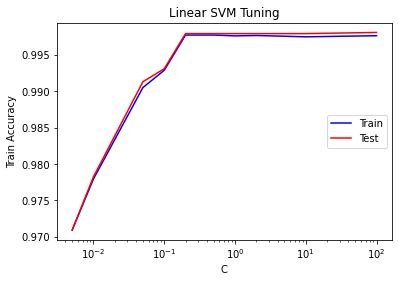

In [23]:
sns.lineplot(data = svc_tuning[svc_tuning['kernel']=='linear'], x='C', y='Train Accuracy', color='blue')
sns.lineplot(data = svc_tuning[svc_tuning['kernel']=='linear'], x='C', y='Test Accuracy', color='red')
plt.title('Linear SVM Tuning')
plt.legend(['Train','Test'], loc='center right')
#plt.axvline(100, color='black', ls='--') 
plt.xscale('log')
plt.show()

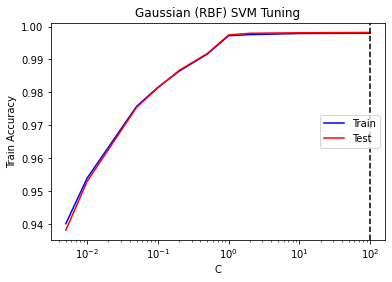

In [22]:
sns.lineplot(data = svc_tuning[svc_tuning['kernel']=='rbf'], x='C', y='Train Accuracy', color='blue')
sns.lineplot(data = svc_tuning[svc_tuning['kernel']=='rbf'], x='C', y='Test Accuracy', color='red')
plt.title('Gaussian (RBF) SVM Tuning')
plt.legend(['Train','Test'], loc='center')
plt.axvline(100, color='black', ls='--') 
plt.xscale('log')
plt.show()

### SGD

In [24]:
sgd_classifier = SVMClassificationModeling(loader.get_df(),'Action',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           None, # no imputation
                           SGDClassifier,
                           StandardScaler(), beta=2)

In [35]:
sgd_classifier.prepare()

In [45]:
sgd_results = sgd_classifier.parameter_tuning({
    "max_iter":1000,
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
    "random_state" : 0,
}, SGDClassifier)

In [46]:
sgd_results

[{'model': SGDClassifier(random_state=0),
  'train_metrics': {'matrix': array([[19507,    17],
          [   90, 26258]], dtype=int64),
   'accuracy': 0.99767,
   'precision': 0.9993529971455757,
   'recall': 0.9965841809625019,
   'f1': 0.9979666685669765,
   'elapsed_time': 0.22780513763427734},
  'test_metrics': {'matrix': array([[ 8361,     7],
          [   37, 11255]], dtype=int64),
   'accuracy': 0.99776,
   'precision': 0.9993784407742852,
   'recall': 0.9967233439603259,
   'f1': 0.9980491265407466,
   'elapsed_time': 0.05436396598815918}},
 {'model': SGDClassifier(penalty='l1', random_state=0),
  'train_metrics': {'matrix': array([[19507,    17],
          [   66, 26282]], dtype=int64),
   'accuracy': 0.99819,
   'precision': 0.9993535875888817,
   'recall': 0.997495066039168,
   'f1': 0.9984234619256557,
   'elapsed_time': 0.22739195823669434},
  'test_metrics': {'matrix': array([[ 8361,     7],
          [   25, 11267]], dtype=int64),
   'accuracy': 0.99837,
   'precision':

In [48]:
sgd_classifier.find_best_model()

{'model': SGDClassifier(loss='perceptron', penalty='l1', random_state=0),
 'train_metrics': {'matrix': array([[19507,    17],
         [   63, 26285]], dtype=int64),
  'accuracy': 0.99826,
  'precision': 0.9993536613185309,
  'recall': 0.9976089266737513,
  'f1': 0.9984805318138651,
  'elapsed_time': 0.20946121215820312},
 'test_metrics': {'matrix': array([[ 8361,     7],
         [   23, 11269]], dtype=int64),
  'accuracy': 0.99847,
  'precision': 0.9993792124866974,
  'recall': 0.9979631597591215,
  'f1': 0.9986706841545552,
  'elapsed_time': 0.054364919662475586}}

## Model's Performance Analysis <a id='performance-analysis'/>

The SVM Classifier resulted in 99.82% accuracy. However, it did run for 7.1 seconds to train the model and less than 1.3 seconds to make the predictions with accuracy of 99.82%.

The final SGD Classifier resulted in 99.85% accuracy with 0.21 sec. to train the model using partial fit approach and less than 0.05 seconds to make the predictions with accuracy of 99.85%.

SGD Train - Confusion Matrix:

|                   | Predicted Denied | Predicted Allowed |
|-------------------|---------------|----------------|
| Actual Denied  | 19,507       | 17             |
| Actual Allowed | 63            | 26,285        |

SGD Test - Confusion Matrix:

|                   | Predicted Denied | Predicted Allowed |
|-------------------|---------------|----------------|
| Actual Denied  | 8,361         | 7              |
| Actual Allowed | 23            | 11,269         |


The final SGD Classifier coefficients are given in the graph below.  The L1 regularization eliminated all but 4 variables, with NAT Destination Port and Elapsed Time (sec) having the largest coefficients by far.

## Model Interpretability & Explainability <a id='model-explanation'>

Which variables were more important and why?

How did you come to the conclusion these variables were important how how should the audience interpret this?

### Final Model Proposal <a id='final-model-proposal'/>

In [39]:
final_classifier = SVMClassificationModeling(loader.get_df(),'Action',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           None,
                           SGDClassifier(loss='perceptron', penalty='l1'),
                           StandardScaler(), beta=2)

### Examining Feature Importance <a id='examining-feature-importance'/>

In [40]:
final_classifier.prepare_and_train()
final_classifier.model.coef_

array([[ 0.        , -0.16578181,  5.03739655, 21.75877594,  0.        ,
         0.        ,  0.        ,  0.        , 53.60530558,  0.43834774,
         0.        ]])

In [41]:
final_classifier.X.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object')

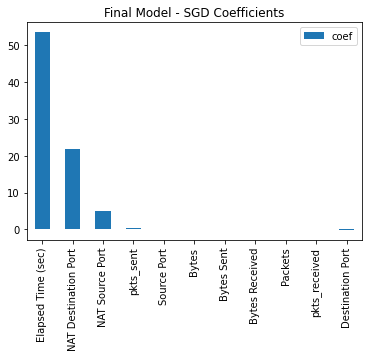

In [49]:
weights = pd.DataFrame(final_classifier.model.coef_[0], final_classifier.X.columns, columns=['coef']).sort_values('coef', ascending=False)
weights.plot(kind='bar')
plt.title('Final Model - SGD Coefficients')
plt.show()

# Conclusion <a id='conclusion'>

What are you proposing to the audience with your models and why?

How should your audience interpret your conclusion and whwere should they go moving forward on the topic?

What other approaches do you recommend exploring?

Bring it all home!

The accuracy obtained from the model could be considered very high at >99.8% for both the training and test sets.  However, depending on how often the firewall has to deal with these requests, that may not be good enough for real-world application. If these requests were coming in at over 1000 per day, that would mean that 1-2 would be incorrectly classified, leading to an important blocked request or an unfortunate malicious attack getting through the firewall.  The model could be further tuned such that more bad requests are blocked, but this would result in blocking more legitimate requests.

Methods used in this case study could be effective with High-Performance Computing (HPC) with multi-core processors to produce more comprehensive and accurate models. Also, more diligence can be done to reduce stochastic gradient descent to obtain minimum loss. The larger volume of data will also help enhance the learning leading to better performance of firewalls. 

The quick convergence of these models in training could indicate that only a few important features and values contribute to the classification. Exploring the data showed that there were a few consistent variable values that always lead to a denied request, so if these are identified quickly in training, the rest of the data likely contributes minimal benefit to classification.

Reviewing other classification algorithms, including Naive Bayes, kNN, Decision Table, and HyperPipes may enhance the model. Based on the article by Erden Ucar & Erkan Ozhan, “ The Analysis of Firewall Policy Through Machine Learning and Data Mining,” published on May 17, 2017, KNN has shown some outstanding results.  However, this would likely be a slow and inefficient model to predict in real time.   

It is equally vital for the companies to update firewall policies regularly and continuously review the firewall logs.


### Future Considerations and Model Enhancements <a id='model-enhancements'/>

### Alternative Modeling Approaches <a id='alternative-modeling-approaches'>

## References

In [ ]:
[1] What Is Firewall: Types, How Does It Work & Advantages | Simplilearn
[2] Difference between IP address and Port Number. https://www.geeksforgeeks.org/difference-between-ip-address-and-port-number/
[3] The Analysis of Firewall Policy Through Machine Learning and Data Mining | SpringerLink (smu.edu)